In [14]:
import numpy as np
import pandas as pd
import pandasql as psql

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier


In [6]:
df = pd.read_csv("~/Downloads/bigml_59c28831336c6604c800002a.csv")

In [7]:
le = LabelEncoder()

df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])

df['total minutes'] = df['total day minutes']+df['total eve minutes']+df['total night minutes']+df['total intl minutes']
df['total calls'] = df['total day calls']+df['total eve calls']+df['total night calls']+df['total intl calls']
df['total cost'] = df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge']
df['cost per day'] = df['total cost']/df['account length']

In [9]:
ct = DecisionTreeClassifier()
X = df.drop(columns = ['churn','phone number','state','area code'])
y = df['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size = .8)
ct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

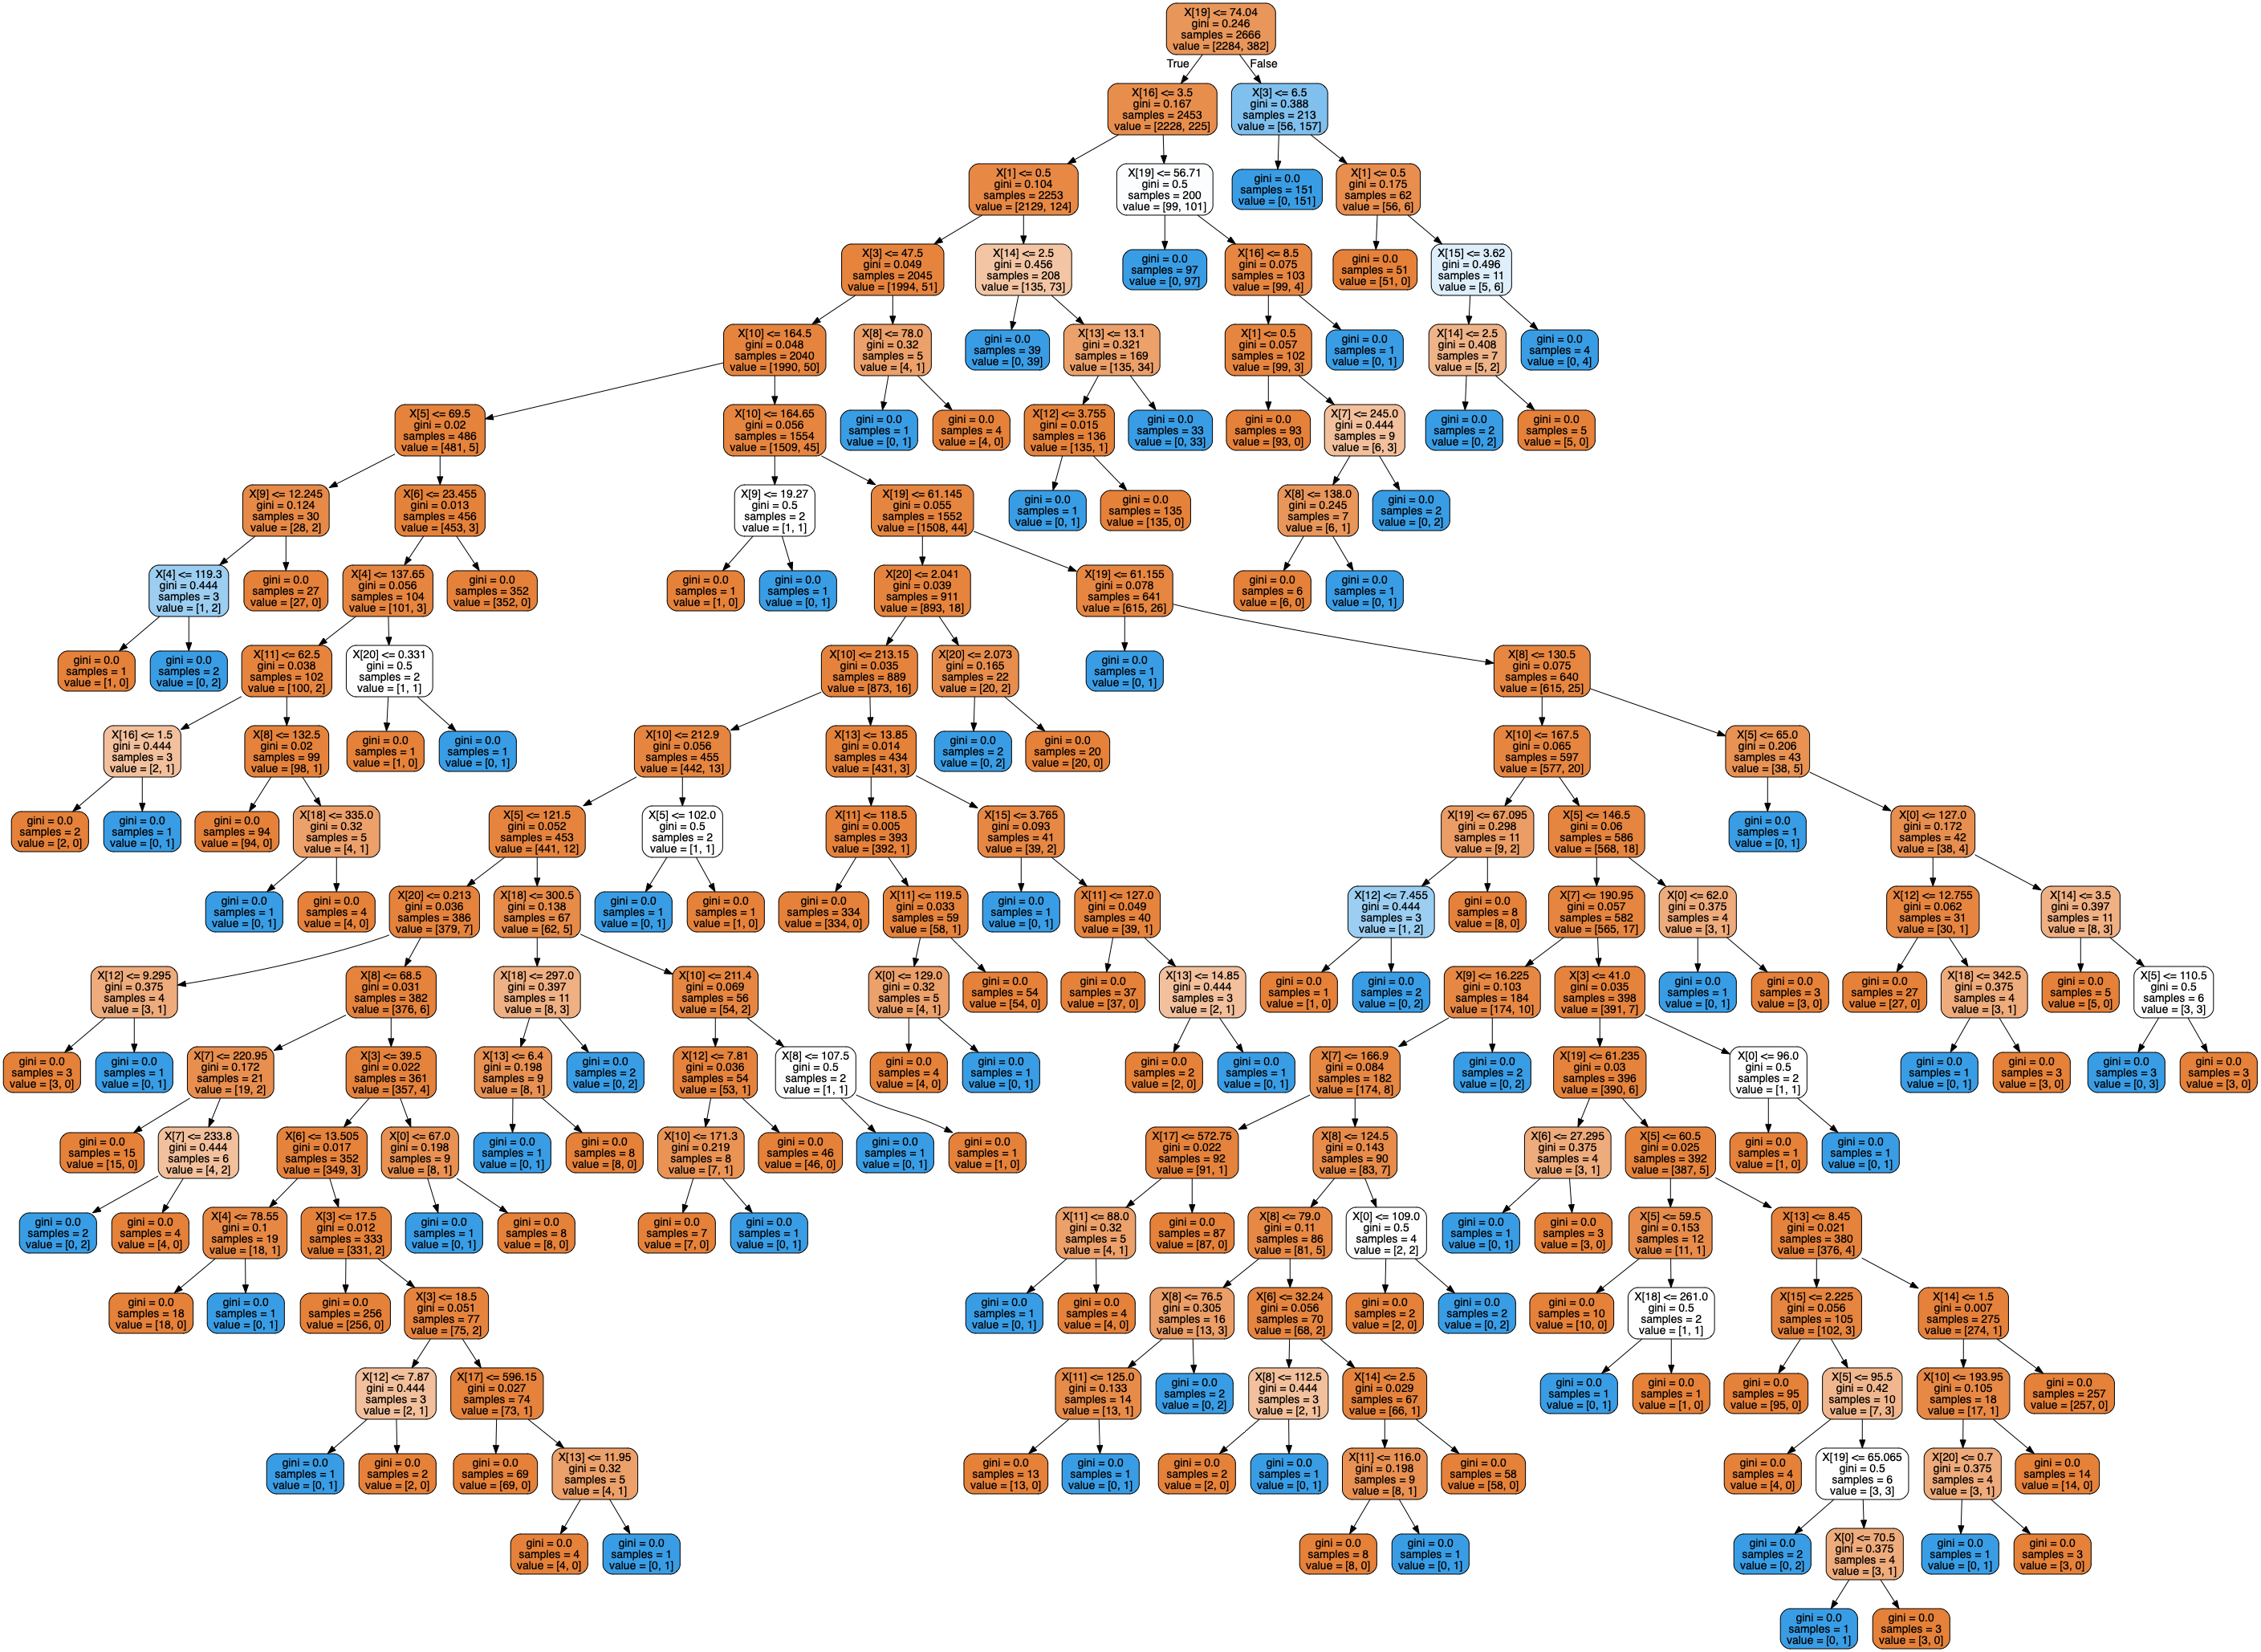

In [21]:
dot_file = StringIO()

export_graphviz(ct, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())